In [178]:
import numpy as np
from collections import defaultdict
from collections import Counter
import pymongo
from __future__ import division
import re
import matplotlib.pyplot as plt
import json 
from scipy import stats

def load_mongo_db():
    client = pymongo.MongoClient()
    db = client['searchx']
    return db

In [3]:
db = load_mongo_db()
logs = db.logs

## Plot per topic KG

In [4]:
def get_topic_id(user):
    db_query = [ r["task"]['data']['topic']['id'] for r in logs.find({ "event" : "SEARCH_QUERY", "userId": user})] 
    return (np.unique(db_query)[0])
def get_topic_terms(user, p):
    import json

    with open('topics.json') as json_file:
        data = json.load(json_file)
        return(data[p]['terms'])

In [9]:
users = ["5b587dc6efcd5c0001cebd03", "5b587dc6efcd5c0001cebd03", "57533f7c483c14000662f391", "5d3a3b28376aea001a66782d",
"5c9e5a042b3c77001544e975", "5d26f5eb7aa0b0000138b4ba", "5d0a993c6e9965001aeafe67", "5c9162220791df0001366aa6","5d4fe8e3f20feb00190b643c",
"5d63bfff79f8dc0015af6de3","5a97081189de8200013eea9b","5952a1dc27f8fb00016213bb","58fd0de6d66f6400016dc0fd",
"5c742bf8ecf82a0015630ec1",
"5caf6c27b480520012eb741b",
"5d34437867a8ff0019dc0403",
"54a7c951fdf99b7cd759d23e",
"5c3f00de1580e9000122ecb5",
"5b0f27321e55760001b9a8a5","5c864b1bd9fe700001023b72","5cacf324ea201200013d7807","5b0c5ae5641b1200010ee49d","59308b35deea010001017c0e","5c28ef690091e40001ca5e99","5bcdf10432e46700016f8f80","595022904df2c40001bf85df","5877f454127d7700018b1bdf","5bf1de1556a321000106fae0","5b09bd6ae9270900013b82be","5cd0cdf9731ab00013a73906","59f8868e05d1d60001f1464d","5b82d4fda284bc000193094c","5d91a7c336017c00192a6755","5d8e3a178b0c840017736451","59bb884a3c45a10001ccc4f7","5d235fa4c9b2ee00190ed9af","58d0632c2fc72000011f8c57","5cf1b0f475b61a0001d00408","5be89ff4d153f500019aa86f","55f244e632af740012170458","5993020a5f49420001caf86b","5b0b1b5a9663ee0001456cec","5d8d0decf345720017634bc0","5d114bdc009d5e001ac94487","5a08bcb6df3fa800015c3678","5d5ba6430ffa48001b458d64","5b6c3818f458f500013774a3","5d27b8fee5af0b00157f41a6","5c3fb34812dd430001d4b4d5","5d971ac046a93c0017005bf1","5b421b9ac2e3810001763252","57843b986475d400015a8e45","5d30eee5e7ca2e001bd4091b","5c1a32c91f191b0001ebe392","5c54b2e0cf1cd900018cf6a6","5bddad5e3dad0a0001e2d79b","5c676d436f250200012a04e8","5977e3867412f8000194e1fe","5d269f7442562200018babe6","59d65ad8e2762800015eb51b","5c5cad3e4ee81200018eafe2","5d404bc74db54a0001fecb92","56cb839cedf8da000c6df35b","5a69fb84eeef45000138d276"]
highiq_users = ['5c9e5a042b3c77001544e975',
 '5d26f5eb7aa0b0000138b4ba',
 '5d34437867a8ff0019dc0403',
 '58d0632c2fc72000011f8c57',
 '5be89ff4d153f500019aa86f',
 '55f244e632af740012170458',
 '5d8d0decf345720017634bc0',
 '5b6c3818f458f500013774a3',
 '5c3fb34812dd430001d4b4d5',
 '5d269f7442562200018babe6',
 '5d404bc74db54a0001fecb92',
               '59d65ad8e2762800015eb51b']
lowiq_users = ['5b587dc6efcd5c0001cebd03', '5b587dc6efcd5c0001cebd03', '57533f7c483c14000662f391', '5d3a3b28376aea001a66782d', '5d0a993c6e9965001aeafe67', '5c9162220791df0001366aa6', '5d4fe8e3f20feb00190b643c', '5d63bfff79f8dc0015af6de3', '5a97081189de8200013eea9b', '5952a1dc27f8fb00016213bb', '58fd0de6d66f6400016dc0fd', '5c742bf8ecf82a0015630ec1', '5caf6c27b480520012eb741b', '54a7c951fdf99b7cd759d23e', '5c3f00de1580e9000122ecb5', '5b0f27321e55760001b9a8a5', '5c864b1bd9fe700001023b72', '5cacf324ea201200013d7807', '5b0c5ae5641b1200010ee49d', '59308b35deea010001017c0e', '5c28ef690091e40001ca5e99', '5bcdf10432e46700016f8f80', '595022904df2c40001bf85df', '5877f454127d7700018b1bdf','5bf1de1556a321000106fae0', '5b09bd6ae9270900013b82be', '5cd0cdf9731ab00013a73906', '59f8868e05d1d60001f1464d', '5b82d4fda284bc000193094c', '5d91a7c336017c00192a6755', '5d8e3a178b0c840017736451', '59bb884a3c45a10001ccc4f7', '5d235fa4c9b2ee00190ed9af', '5cf1b0f475b61a0001d00408', '5993020a5f49420001caf86b', '5b0b1b5a9663ee0001456cec', '5d114bdc009d5e001ac94487', '5d5ba6430ffa48001b458d64', '5d27b8fee5af0b00157f41a6', '5d971ac046a93c0017005bf1', '5b421b9ac2e3810001763252', '57843b986475d400015a8e45', '5d30eee5e7ca2e001bd4091b', '5c1a32c91f191b0001ebe392', '5c54b2e0cf1cd900018cf6a6', '5bddad5e3dad0a0001e2d79b', '5c676d436f250200012a04e8', '5977e3867412f8000194e1fe', '5c5cad3e4ee81200018eafe2', '56cb839cedf8da000c6df35b','5a69fb84eeef45000138d276']

In [6]:
def absolute_learning_gain( userId):
    intermid_dict = { }
    topic = get_topic_id(userId)
    topic_terms = get_topic_terms(userId, topic)
    pretest_results = [ r for r in logs.find({ "event" : "SURVEY_PRE_TEST_RESULTS", "userId" :userId}).sort("date", -1)]  
    pretest_results = pretest_results[0] 
    posttest_results = logs.find_one({ "event" : "SURVEY_POST_TEST_RESULTS", "userId" :userId}) 
    score = 0
    for question in topic_terms:  
        qid = "Q-" + str(topic) + "-" + str(question)  
        if int(pretest_results['meta']['data'][qid]) == 3 or int(pretest_results['meta']['data'][qid]) == 4:
            score+=1
    intermid_dict['0']= score
    
    intermediate_results = [ r for r in logs.find({ "event" : "SURVEY_INTERMEDIATE_TEST_RESULTS", "userId" :userId})]
    for test in intermediate_results:
        score = 0
        for question in topic_terms:  
            qid = "Q-" + str(topic) + "-" + str(question)  
            if qid in test['meta']['data'].keys():
                if int(test['meta']['data'][qid]) == 3 or int(test['meta']['data'][qid]) == 4:
                    score+=1
        intermid_dict[str(test['meta']['session'])] = score
        
        if str(test['meta']['session']) == '3':
            if posttest_results:
                score = 0
                for question in topic_terms:  
                    qid = "Q-" + str(topic) + "-" + str(question)
                    if qid in test['meta']['data'].keys():
                        if int(test["meta"]["data"][qid]) == 1 or int(test["meta"]["data"][qid]) == 2:  
                            if int(posttest_results["meta"]["data"][qid]) == 3 or int(posttest_results["meta"]["data"][qid]) == 4:  
                                score += 1
                intermid_dict['4'] = score
            else:
                intermid_dict['4'] = 0
    
    for i in range(5):
        if str(i) not in intermid_dict.keys():
            print("this happened",  "test", str(i) )
            intermid_dict[str(i)] = 0
    return intermid_dict 

In [33]:
def cum_absolute_learning_gain( userId):
    intermid_dict = { }
    topic = get_topic_id(userId)
    topic_terms = get_topic_terms(userId, topic)
    pretest_results = [ r for r in logs.find({ "event" : "SURVEY_PRE_TEST_RESULTS", "userId" :userId})]  
    pretest_results = pretest_results[0] 
    posttest_results = logs.find_one({ "event" : "SURVEY_POST_TEST_RESULTS", "userId" :userId}) 
    score = 0
    for question in topic_terms:  
        qid = "Q-" + str(topic) + "-" + str(question)  
        if int(pretest_results['meta']['data'][qid]) == 3 or int(pretest_results['meta']['data'][qid]) == 4:
            score+=1
    intermid_dict['0']= score
    if score >= 3:
        print("high IQ", userId)

    intermediate_results = [ r for r in logs.find({ "event" : "SURVEY_INTERMEDIATE_TEST_RESULTS", "userId" :userId})]

    for test in intermediate_results:
#         print("session", test['meta']['session'])
        for question in topic_terms:  
            qid = "Q-" + str(topic) + "-" + str(question)  
            if 'data' in test['meta'].keys():
                if qid in test['meta']['data'].keys():
                    if int(test['meta']['data'][qid]) == 3 or int(test['meta']['data'][qid]) == 4:
    #                     print("score", score)
                        score+=1
        intermid_dict[str(test['meta']['session'])] = score

        if str(test['meta']['session']) == '3':
            if posttest_results:
                
                for question in topic_terms:  
                    qid = "Q-" + str(topic) + "-" + str(question)
                    if qid in test['meta']['data'].keys():
                        if int(test["meta"]["data"][qid]) == 1 or int(test["meta"]["data"][qid]) == 2:  
                            if int(posttest_results["meta"]["data"][qid]) == 3 or int(posttest_results["meta"]["data"][qid]) == 4:  
                                score += 1
                intermid_dict['4'] = score
            else:
                intermid_dict['4'] = score
    
    for i in range(5):
        if str(i) not in intermid_dict.keys():
#             print("this happened",  "test", str(i) )
            intermid_dict[str(i)] = intermid_dict[str(i-1)]
    return intermid_dict 

In [153]:
cum_alg_dict = {'0': [], '1': [], '2': [], '3': [], '4':[] }
topic_wise_rpl = {k: {str(i):[] for i in range(5)} for k in np.arange(11)}
print(topic_wise_alg)
for count, user in enumerate(users):
    print(count)
    topic_id = get_topic_id(user)
    dict2 = cum_absolute_learning_gain(user)
    for i in range(5):
        cum_alg_dict[str(i)].append(dict2[str(i)])
print(topic_wise_alg)  


for topic in range(1,11):
    c = 0
    for count, user in enumerate(users):
        topic_id = get_topic_id(user)
        if str(topic) == str(topic_id):
            c+=1
            for i in range(5):
#                 print(topic_wise_alg[topic][str(i)])
                topic_wise_alg[topic][str(i)].append(cum_alg_dict[str(i)][count])
    
    with open('topics.json') as json_file:
        data = json.load(json_file)
        print(data[str(topic)]['title'], "count=", c )

{0: {'1': [], '0': [], '3': [], '2': [], '4': []}, 1: {'1': [], '0': [], '3': [], '2': [], '4': []}, 2: {'1': [], '0': [], '3': [], '2': [], '4': []}, 3: {'1': [], '0': [], '3': [], '2': [], '4': []}, 4: {'1': [], '0': [], '3': [], '2': [], '4': []}, 5: {'1': [], '0': [], '3': [], '2': [], '4': []}, 6: {'1': [], '0': [], '3': [], '2': [], '4': []}, 7: {'1': [], '0': [], '3': [], '2': [], '4': []}, 8: {'1': [], '0': [], '3': [], '2': [], '4': []}, 9: {'1': [], '0': [], '3': [], '2': [], '4': []}, 10: {'1': [], '0': [], '3': [], '2': [], '4': []}}
0
1
2
3
4
('high IQ', '5c9e5a042b3c77001544e975')
5
('high IQ', '5d26f5eb7aa0b0000138b4ba')
6
7
8
9
10
11
12
13
14
15
('high IQ', '5d34437867a8ff0019dc0403')
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
('high IQ', '58d0632c2fc72000011f8c57')
37
38
('high IQ', '5be89ff4d153f500019aa86f')
39
('high IQ', '55f244e632af740012170458')
40
41
42
('high IQ', '5d8d0decf345720017634bc0')
43
44
('high IQ', '5a08bcb6df3fa800015c3678')
45


In [128]:
topic_wise_alg[0][str(1)] = topic_wise_alg[0][str(1)] + [5]

In [139]:
data

{u'0': {u'description': u'Imagine you are taking an introductory course on Sports. For your term paper, you have decided to write about <b>Sports Development and Coaching </b>. ',
  u'terms': [u'olympics',
   u'weight lifting',
   u'karate',
   u'martial art',
   u'aerobics',
   u'athletes',
   u'soccer',
   u'baseball',
   u'snowboarding',
   u'hockey'],
  u'title': u'Sports'},
 u'1': {u'course': u'Physics',
  u'description': u'Imagine that you are taking an introductory Physics course this term. For your term paper, you have decided to write about <b>radioactivity</b>. You also would like to write about <b>how radioactivity happens and what types of radioactivity exist</b>.',
  u'terms': [u'Auger electron',
   u'Coulomb barrier',
   u'beta-plus emission',
   u'isomeric transition',
   u'K-shell electron',
   u'isobaric process',
   u'beta-minus decay',
   u'conversion electron',
   u'antimatter',
   u'electron capture decay'],
  u'title': u'Radioactive decay',
  u'youtube': u'p7uC7wM

In [136]:
topic_wise_alg

{0: {'0': [], '1': [], '2': [], '3': [], '4': []},
 1: {'0': [0, 0, 0, 2, 0, 4, 0],
  '1': [6, 0, 0, 5, 0, 6, 0],
  '2': [10, 0, 0, 8, 1, 6, 0],
  '3': [10, 0, 0, 9, 3, 7, 1],
  '4': [10, 4, 1, 10, 3, 9, 1]},
 2: {'0': [2, 0, 0, 0, 0],
  '1': [3, 0, 2, 2, 1],
  '2': [4, 1, 5, 4, 1],
  '3': [6, 2, 11, 4, 1],
  '4': [7, 4, 11, 5, 1]},
 3: {'0': [0, 0, 0, 0, 0, 0, 2, 9, 6, 0, 0, 0, 10, 1],
  '1': [0, 0, 0, 0, 1, 0, 2, 9, 7, 0, 0, 2, 10, 3],
  '2': [0, 0, 0, 0, 1, 0, 3, 9, 9, 1, 3, 2, 10, 5],
  '3': [0, 2, 0, 3, 3, 1, 4, 9, 10, 2, 6, 2, 10, 6],
  '4': [0, 2, 0, 3, 3, 1, 5, 10, 10, 2, 6, 2, 10, 7]},
 4: {'0': [3, 8, 1],
  '1': [3, 8, 1],
  '2': [3, 9, 1],
  '3': [3, 10, 1],
  '4': [3, 10, 3]},
 5: {'0': [1, 2, 1, 3, 0, 2],
  '1': [2, 2, 3, 5, 1, 3],
  '2': [3, 5, 4, 5, 1, 3],
  '3': [6, 8, 7, 5, 1, 6],
  '4': [6, 8, 7, 5, 3, 8]},
 6: {'0': [2, 2, 0, 0, 4, 0, 3],
  '1': [3, 3, 2, 1, 5, 1, 3],
  '2': [4, 4, 7, 1, 6, 4, 4],
  '3': [7, 7, 9, 1, 6, 4, 5],
  '4': [9, 9, 9, 2, 7, 5, 10]},
 7: {'0'

1
2
3
4
5
6
7
8
9
10


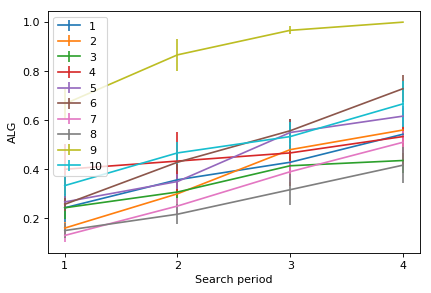

In [169]:
from scipy import stats
plt.figure(figsize=(6, 4), dpi=80)

for i in range(1,11):
    print(i)
    yerr_m = [stats.sem(topic_wise_alg[i][str(key)])/(2*10) for  key in np.sort([int(k) for k in topic_wise_alg[i].keys()])][1:5]
    line1 =   plt.errorbar(np.arange(4),[np.mean(topic_wise_alg[i][str(key)])/10 for  key in np.sort([int(k) for k in topic_wise_alg[i].keys()])][1:5], yerr_m, label =str(i))
    # plt.legend(loc='lower left', frameon=False)
    plt.ylabel("ALG")
    plt.xlabel("Search period")
    plt.xticks(np.arange(4), ('1', '2', '3', '4'))
    plt.legend()
#     plt.legend(str(i))
#     plt.title("Pre Test Score >= 3 (11 users)")


# yerr_m = [stats.sem(lowiq_cum_alg_dict[str(key)])/(2*10) for  key in np.sort([int(k) for k in lowiq_cum_alg_dict.keys()])][1:5]
# line2 = plt.errorbar(np.arange(4),[np.mean(lowiq_cum_alg_dict[str(key)])/10 for  key in np.sort([int(k) for k in lowiq_cum_alg_dict.keys()])][1:5], yerr_m)
# # plt.legend(loc='lower left', frameon=False)
# plt.ylabel("ALG")
# plt.xlabel("Search period")
# plt.xticks(np.arange(4), ('1', '2', '3', '4'))
# plt.legend((line1,line2),("Pre Test Score >= 3 (11 users)","Pre Test Score < 3 (53 users)"))

1
2
3
4
5
6
7
8
9
10


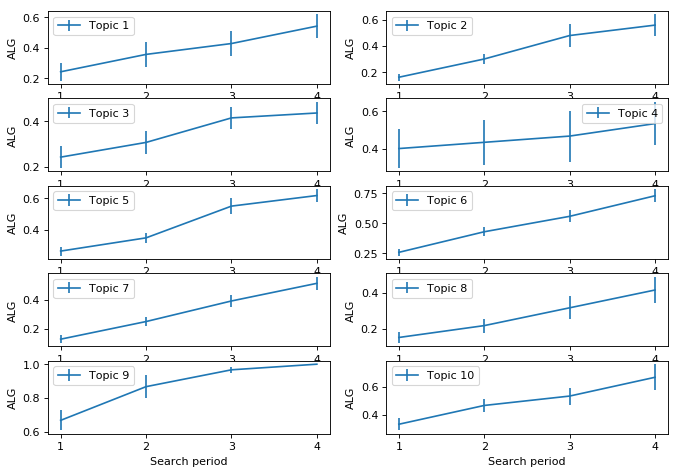

In [176]:
from scipy import stats
plt.figure(figsize=(10, 7), dpi=80)

for i in range(1,11):
    print(i)
    plt.subplot(5,2,i)
    yerr_m = [stats.sem(topic_wise_alg[i][str(key)])/(2*10) for  key in np.sort([int(k) for k in topic_wise_alg[i].keys()])][1:5]
    line1 =   plt.errorbar(np.arange(4),[np.mean(topic_wise_alg[i][str(key)])/10 for  key in np.sort([int(k) for k in topic_wise_alg[i].keys()])][1:5], yerr_m, label ="Topic " + str(i))
    # plt.legend(loc='lower left', frameon=False)
    plt.ylabel("ALG")
    plt.xlabel("Search period")
    plt.xticks(np.arange(4), ('1', '2', '3', '4'))
    plt.legend()

In [151]:
[np.mean(topic_wise_alg[10][str(key)])/10 for  key in np.sort([int(k) for k in topic_wise_alg[10].keys()])][1:5]

[0.33333333333333337,
 0.4666666666666667,
 0.5333333333333333,
 0.6666666666666667]

In [177]:
[np.mean(topic_wise_alg[topic]['0']) for topic in topic_wise_alg.keys()]

[nan,
 0.8571428571428571,
 0.4,
 2.0,
 4.0,
 1.5,
 1.5714285714285714,
 0.1,
 1.0,
 4.333333333333333,
 2.3333333333333335]

In [189]:
for x in range(5):
    a = topic_wise_alg[1][str(x)]
    b = topic_wise_alg[2][str(x)]
    c = topic_wise_alg[3][str(x)]
    d = topic_wise_alg[4][str(x)]
    e = topic_wise_alg[5][str(x)]
    f = topic_wise_alg[6][str(x)]
    g = topic_wise_alg[7][str(x)]
    h = topic_wise_alg[8][str(x)]
    i = topic_wise_alg[9][str(x)]
    j = topic_wise_alg[10][str(x)]
        
    print("Test ", str(x), "result is:", stats.kruskal(a, b, c, d, e, f, g, h, i, j))

('Test ', '0', 'result is:', KruskalResult(statistic=20.654498766904258, pvalue=0.014276055806851783))
('Test ', '1', 'result is:', KruskalResult(statistic=13.47485102442963, pvalue=0.1422702889451293))
('Test ', '2', 'result is:', KruskalResult(statistic=12.555123781994473, pvalue=0.1837909385344452))
('Test ', '3', 'result is:', KruskalResult(statistic=9.695939262272345, pvalue=0.37565674838803276))
('Test ', '4', 'result is:', KruskalResult(statistic=10.497489045002435, pvalue=0.31173017147794985))


In [272]:
topic_wise_alg


{0: {'0': [], '1': [], '2': [], '3': [], '4': []},
 1: {'0': [0, 0, 0, 2, 0, 4, 0],
  '1': [6, 0, 0, 5, 0, 6, 0],
  '2': [10, 0, 0, 8, 1, 6, 0],
  '3': [10, 0, 0, 9, 3, 7, 1],
  '4': [10, 4, 1, 10, 3, 9, 1]},
 2: {'0': [2, 0, 0, 0, 0],
  '1': [3, 0, 2, 2, 1],
  '2': [4, 1, 5, 4, 1],
  '3': [6, 2, 11, 4, 1],
  '4': [7, 4, 11, 5, 1]},
 3: {'0': [0, 0, 0, 0, 0, 0, 2, 9, 6, 0, 0, 0, 10, 1],
  '1': [0, 0, 0, 0, 1, 0, 2, 9, 7, 0, 0, 2, 10, 3],
  '2': [0, 0, 0, 0, 1, 0, 3, 9, 9, 1, 3, 2, 10, 5],
  '3': [0, 2, 0, 3, 3, 1, 4, 9, 10, 2, 6, 2, 10, 6],
  '4': [0, 2, 0, 3, 3, 1, 5, 10, 10, 2, 6, 2, 10, 7]},
 4: {'0': [3, 8, 1],
  '1': [3, 8, 1],
  '2': [3, 9, 1],
  '3': [3, 10, 1],
  '4': [3, 10, 3]},
 5: {'0': [1, 2, 1, 3, 0, 2],
  '1': [2, 2, 3, 5, 1, 3],
  '2': [3, 5, 4, 5, 1, 3],
  '3': [6, 8, 7, 5, 1, 6],
  '4': [6, 8, 7, 5, 3, 8]},
 6: {'0': [2, 2, 0, 0, 4, 0, 3],
  '1': [3, 3, 2, 1, 5, 1, 3],
  '2': [4, 4, 7, 1, 6, 4, 4],
  '3': [7, 7, 9, 1, 6, 4, 5],
  '4': [9, 9, 9, 2, 7, 5, 10]},
 7: {'0'

In [196]:
for x in range(5):
    for topic in range(1,11):
        if topic!=9:
            t = topic_wise_alg[topic][str(x)]
            i = topic_wise_alg[9][str(x)]
            stat = stats.kruskal(i, t)
            if stat.pvalue <= 0.05:
                print("Step ", str(x), " and topic ", topic)

('Step ', '0', ' and topic ', 1)
('Step ', '0', ' and topic ', 2)
('Step ', '0', ' and topic ', 7)
('Step ', '0', ' and topic ', 8)
('Step ', '1', ' and topic ', 2)
('Step ', '1', ' and topic ', 5)
('Step ', '1', ' and topic ', 6)
('Step ', '1', ' and topic ', 7)
('Step ', '1', ' and topic ', 8)
('Step ', '2', ' and topic ', 2)
('Step ', '2', ' and topic ', 3)
('Step ', '2', ' and topic ', 5)
('Step ', '2', ' and topic ', 6)
('Step ', '2', ' and topic ', 7)
('Step ', '2', ' and topic ', 8)
('Step ', '3', ' and topic ', 3)
('Step ', '3', ' and topic ', 5)
('Step ', '3', ' and topic ', 6)
('Step ', '3', ' and topic ', 7)
('Step ', '3', ' and topic ', 8)
('Step ', '3', ' and topic ', 10)
('Step ', '4', ' and topic ', 3)
('Step ', '4', ' and topic ', 5)
('Step ', '4', ' and topic ', 6)
('Step ', '4', ' and topic ', 7)
('Step ', '4', ' and topic ', 8)
('Step ', '4', ' and topic ', 10)


## Cross-checking validity of 3 and 4

In [225]:
three = []
for user in users:
#     print(user)
    posttest_results = [ r for r in logs.find({ "event" : "SURVEY_INTERMEDIATE_TEST_RESULTS", "userId" : user})]
    topic = get_topic_id(user)
    topic_terms = get_topic_terms(user, topic)
    for test in posttest_results:
        if test:
            
            for question in topic_terms:  
                qid = "Q-" + str(topic) + "-" + str(question)
                mid = "meaning-Q-" + str(topic) + "-" + str(question)
                if 'data' in test['meta'].keys():
                    if qid in test['meta']['data'].keys():
                        if int(test["meta"]["data"][qid]) == 3:
                            three.append([user, data[str(topic)]['title'], question, test["meta"]["data"][mid]])

In [262]:
 three = list(set(tuple(element) for element in three))

In [263]:
len(three)

128

In [268]:
random.sample(np.arange(len(three)), 50)

[62,
 122,
 34,
 50,
 48,
 93,
 39,
 80,
 99,
 70,
 88,
 59,
 54,
 87,
 21,
 125,
 33,
 1,
 26,
 31,
 55,
 29,
 121,
 25,
 82,
 68,
 102,
 5,
 42,
 63,
 49,
 94,
 92,
 116,
 18,
 113,
 11,
 47,
 112,
 56,
 19,
 71,
 10,
 86,
 16,
 22,
 120,
 58,
 127,
 126]

In [269]:
random_list = random.sample(np.arange(len(three)), 50)
with open("answered_three_mod.csv", 'w') as f:
    for item in random_list:
        for elem in three[item]:
            f.write("%s\t" % elem)
        f.write("\n")

In [270]:
four = []
for user in users:
#     print(user)
    posttest_results = [ r for r in logs.find({ "event" : "SURVEY_INTERMEDIATE_TEST_RESULTS", "userId" : user})]
    topic = get_topic_id(user)
    topic_terms = get_topic_terms(user, topic)
    for test in posttest_results:
        if test:
            
            for question in topic_terms:  
                qid = "Q-" + str(topic) + "-" + str(question)
                mid = "meaning-Q-" + str(topic) + "-" + str(question)
                if 'data' in test['meta'].keys():
                    if qid in test['meta']['data'].keys():
                        if int(test["meta"]["data"][qid]) == 4:
                            four.append([user, data[str(topic)]['title'], question, test["meta"]["data"][mid]])
four = list(set(tuple(element) for element in four))

In [274]:
random_list = random.sample(np.arange(len(four)), 50)
with open("answered_four.csv", 'w') as f:
    for item in random_list:
        for elem in four[item]:
            f.write("%s\t" % elem)
        f.write("\n")

In [273]:
four

[('5c742bf8ecf82a0015630ec1',
  u'Anesthesia',
  u'fentanyl',
  u'an opioid used as pain medication'),
 ('5c28ef690091e40001ca5e99',
  u'Water quality chemistry',
  u'blue baby syndrome',
  u'bad heart condition caused by nitrates in water, changes form of Hb'),
 ('5be89ff4d153f500019aa86f',
  u'Water quality chemistry',
  u'blue baby syndrome',
  u'An excess of nitrates in water supply can oxidize hemoglobin in blood, causing a blue tinted skin '),
 ('5c9162220791df0001366aa6',
  u'Qubit',
  u'excited state',
  u'any atom that is in a quantum state that has a higher energy than the bare minimum energy'),
 ('5d3a3b28376aea001a66782d',
  u'Glycolysis',
  u'cellular respiration',
  u'Cells converting energy and then releasing waste'),
 ('5b6c3818f458f500013774a3',
  u'Depression',
  u'electroconvulsive therapy',
  u'formerly Shock therapy, a treatment thats in decline and stimulates seizures for treatment of psychiatric conditions '),
 ('5bcdf10432e46700016f8f80',
  u'Qubit',
  u'conjuga

In [ ]:
for user in users:
    register_results = [ r for r in logs.find({ "event" : "SURVEY_REGISTER_RESULTS", "userId" :userId}).sort("date", -1)]  